# First Project on Data analysis


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Csv file

In [2]:
data = pd.read_csv("project_1_data.csv")

### Checking all the data


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df = pd.DataFrame(data)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [6]:
df.isnull().any().sum()
print(df.isnull().sum())

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


#### Deleting Null Value

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().any().sum()
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### Checking Duplicate values

In [9]:
df.duplicated().any().sum()

1

#### Deleting Duplicate value

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().any().sum()

0

#### Columns

In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Data Types

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [14]:
df['InvoiceDate'].dtypes

dtype('O')

In [15]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dtype

dtype('<M8[ns]')

# Negetive values

In [16]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,535187.000000,535187,535187.000000,535187.000000
mean,9.671593,2011-07-04 11:43:44.485273600,4.645242,15282.618281
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,14356.000000
50%,3.000000,2011-07-19 15:38:00,2.080000,15287.000000
75%,10.000000,2011-10-19 08:20:00,4.130000,16242.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.059056,NaN,97.364810,1484.769684


In [17]:
minUP = df[df['UnitPrice']<0]
minUP


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


In [18]:
minQT = df[df['Quantity']<0]
minQT

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [19]:
minQT.count()

InvoiceNo      9725
StockCode      9725
Description    9725
Quantity       9725
InvoiceDate    9725
UnitPrice      9725
CustomerID     9725
Country        9725
dtype: int64

# Deleting error values

In [20]:
df.drop(df[df['Quantity']<0].index, inplace=True)

In [21]:
df.drop(df[df['UnitPrice']<0].index, inplace=True)

In [22]:
minQT = df[df['Quantity']<0]
minQT

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
minUP = df[df['UnitPrice']<0]
minUP


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Analtical Questions 

#### 1. Total Revenue Calculation: What is the total revenue generated from the sales in this dataset?


In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
df['TotalRevenue'] = df['Quantity']*df['UnitPrice']


In [26]:
df['TotalRevenue']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalRevenue, Length: 525460, dtype: float64

In [27]:
totalRevenue = df['TotalRevenue'].sum()
print(f"Total Revenue is {totalRevenue} dollars")

Total Revenue is 10642110.804000003 dollars


#### 2. Top Customers: Who are the top 10 customers in terms of total revenue?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525460 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     525460 non-null  object        
 1   StockCode     525460 non-null  object        
 2   Description   525460 non-null  object        
 3   Quantity      525460 non-null  int64         
 4   InvoiceDate   525460 non-null  datetime64[ns]
 5   UnitPrice     525460 non-null  float64       
 6   CustomerID    525460 non-null  int64         
 7   Country       525460 non-null  object        
 8   TotalRevenue  525460 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 40.1+ MB


In [29]:
top_customers = df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(10)

In [30]:
top_customers

CustomerID
15287    1755388.60
14646     280206.02
18102     259657.30
17450     194390.79
16446     168472.50
14911     143711.17
12415     124914.53
14156     117210.08
17511      91062.38
16029      80850.84
Name: TotalRevenue, dtype: float64

### Too spread

In [31]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalRevenue
count,525460.00000,525460,525460.000000,525460.00000,525460.000000
mean,10.68106,2011-07-04 14:16:12.948540160,3.918228,15287.54921,20.252942
min,1.00000,2010-12-01 08:26:00,0.000000,12346.00000,0.000000
25%,1.00000,2011-03-28 11:36:00,1.250000,14381.00000,3.900000
50%,4.00000,2011-07-20 10:11:30,2.080000,15287.00000,9.920000
75%,11.00000,2011-10-19 11:41:00,4.130000,16244.00000,17.700000
max,80995.00000,2011-12-09 12:50:00,13541.330000,18287.00000,168469.600000
std,157.39957,NaN,36.073270,1481.42432,271.543898


#### 3. Sales by Country: What are the total sales per country?

In [32]:
salesByCoyntry = df.groupby('Country')['TotalRevenue'].sum()
salesByCoyntry

Country
Australia                138453.810
Austria                   10198.680
Bahrain                     754.140
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20440.540
Cyprus                    13502.850
Czech Republic              826.740
Denmark                   18955.340
EIRE                     283140.520
European Community         1300.250
Finland                   22546.080
France                   209625.370
Germany                  228678.400
Greece                     4760.520
Hong Kong                 15483.000
Iceland                    4310.000
Israel                     8129.410
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal            

In [33]:
salesByCoyntry.nlargest(10)

Country
United Kingdom    9001744.094
Netherlands        285446.340
EIRE               283140.520
Germany            228678.400
France             209625.370
Australia          138453.810
Spain               61558.560
Switzerland         57067.600
Belgium             41196.340
Sweden              38367.830
Name: TotalRevenue, dtype: float64

# Removing outliers

In [34]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue'],
      dtype='object')

In [35]:
df[['UnitPrice','Quantity']].describe()

,UnitPrice,Quantity
count,525460.000000,525460.00000
mean,3.918228,10.68106
std,36.073270,157.39957
min,0.000000,1.00000
25%,1.250000,1.00000
50%,2.080000,4.00000
75%,4.130000,11.00000
max,13541.330000,80995.00000


In [36]:
df['Quantity'].min()

1

#### 4. Monthly Sales Trends: How do sales trends vary on a monthly basis?

In [37]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue'],
      dtype='object')

In [38]:
import datetime as dt

In [39]:
df['Month'] = df['InvoiceDate'].dt.month
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [40]:
df['Month_Name']=df['InvoiceDate'].dt.month_name()
df['Month_Name'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [41]:
df['Year']= df['InvoiceDate'].dt.year
df['Year'].unique()

array([2010, 2011])

In [42]:
monthlySales = df.groupby(['Year','Month','Month_Name'])['TotalRevenue'].sum()
print(monthlySales)

Year  Month  Month_Name
2010  12     December       821452.730
2011  1      January        689811.610
      2      February       522545.560
      3      March          716215.260
      4      April          536968.491
      5      May            769296.610
      6      June           760547.010
      7      July           718076.121
      8      August         757841.380
      9      September     1056435.192
      10     October       1151263.730
      11     November      1503866.780
      12     December       637790.330
Name: TotalRevenue, dtype: float64


#### 5. Most Popular Products: What are the top 10 best-selling products by quantity?

In [43]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,12,December,2010


In [44]:
print(df['Description'].nunique())
print(df['StockCode'].nunique())
# why both are not same.....?

4077
3925


checking which has duplicate values

In [45]:
product = df.groupby(['StockCode','Description'])['Quantity'].sum().reset_index()
product

,StockCode,Description,Quantity
0,10002,INFLATABLE POLITICAL GLOBE,860
1,10080,GROOVY CACTUS INFLATABLE,303
2,10080,check,22
3,10120,DOGGY RUBBER,192
4,10123C,HEARTS WRAPPING TAPE,5
...,...,...,...
4314,gift_0001_20,to push order througha s stock was,10
4315,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4316,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4317,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [46]:
# Top 10 products
topProduct = product.sort_values(by='Quantity',ascending=False).head(10)
topProduct

,StockCode,Description,Quantity
2772,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2216,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
3259,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
3768,85099B,JUMBO BAG RED RETROSPOT,48375
3791,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37584
1188,22197,POPCORN HOLDER,36749
476,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
3555,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
2113,23084,RABBIT NIGHT LIGHT,30739
1466,22492,MINI PAINT SET VINTAGE,26633


#### 6. Average Order Value: What is the average order value for each customer?

In [47]:
df.head(0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year


In [48]:
avarage_order = df.groupby('CustomerID')['TotalRevenue'].mean()
print(avarage_order)

CustomerID
12346    77183.600000
12347       23.681319
12348       57.975484
12349       24.076027
12350       19.670588
             ...     
18280       18.060000
18281       11.545714
18282       14.837500
18283        2.837074
18287       26.246857
Name: TotalRevenue, Length: 4339, dtype: float64


### 7. Frequent Buyers: Which customers made the most frequent purchases?

In [49]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year'],
      dtype='object')

In [50]:
freq_buyer = df.groupby('CustomerID').size().reset_index(name='TotalPurchase')
freq_buyer

,CustomerID,TotalPurchase
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


In [51]:

topFreqBuyer = freq_buyer.sort_values(by='TotalPurchase',ascending=False)
topFreqBuyer

,CustomerID,TotalPurchase
2160,15287,132748
4011,17841,7676
1880,14911,5672
1290,14096,5111
326,12748,4413
...,...,...
2639,15940,1
2559,15823,1
2541,15802,1
2506,15753,1


### 8. Sales on Weekdays vs. Weekends: How do sales compare between weekdays and weekends?

In [52]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year'],
      dtype='object')

In [53]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
weekday_sales = df[df['DayOfWeek'] < 5]['TotalRevenue'].sum()
weekend_sales = df[df['DayOfWeek'] >= 5]['TotalRevenue'].sum()
print(f"Weekday Sales: {weekday_sales}\nWeekend Sales: {weekend_sales}")


Weekday Sales: 9835320.023000002
Weekend Sales: 806790.7810000001


#### 9. Repeat Purchase Rate: What percentage of customers made repeat purchases?


In [54]:
# checking if a customer repeat perchase or not
df['CustomerID'].duplicated().any()

True

In [55]:
df['CustomerID'].nunique()

4339

In [56]:
total=df['CustomerID'].count()
total

525460

In [57]:

repeat_customers = df['CustomerID'].nunique() / total
print(f"Repeat Purchase Rate: {repeat_customers * 100}%")


Repeat Purchase Rate: 0.8257526738476764%


### 10.High-Value Orders: What are the highest-value orders in the dataset?

In [58]:
high_value_orders = df.nlargest(10, 'TotalRevenue')
high_value_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Month_Name,Year,DayOfWeek
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,12,December,2011,4
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,1,January,2011,1
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.00,6,June,2011,4
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,15287,United Kingdom,13541.33,12,December,2010,1
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,15287,United Kingdom,11062.06,8,August,2011,4
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,5,May,2011,1
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72,9,September,2011,1
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.40,1,January,2011,1
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40,4,April,2011,0
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00,10,October,2011,3


# Visualization Questions


#### 1. Revenue Over Time: Create a line chart showing total monthly revenue. 

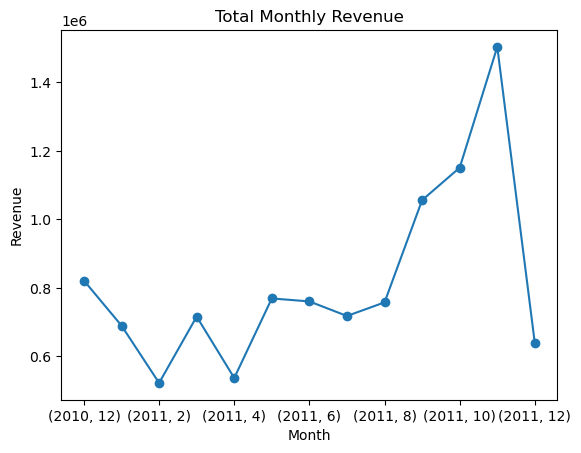

In [59]:
monthlySales = df.groupby(['Year','Month'])['TotalRevenue'].sum()
monthlySales.plot(kind='line', title='Total Monthly Revenue',marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

#### 2. Sales Distribution by Country: Create a bar chart showing sales distribution across different countries.

In [60]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year', 'DayOfWeek'],
      dtype='object')

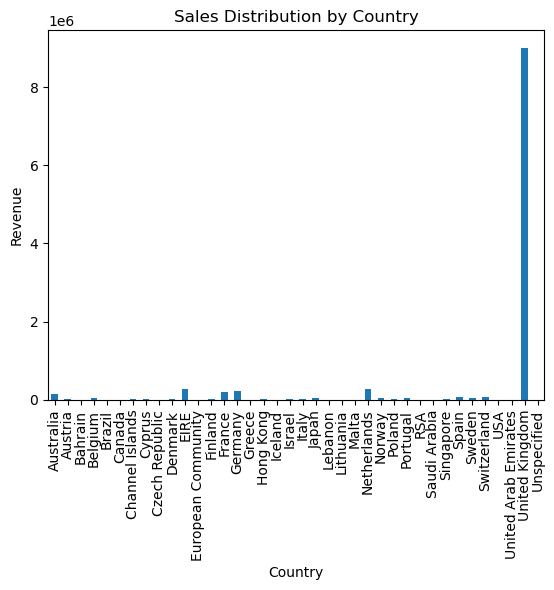

In [61]:
salesByCoyntry.plot(kind='bar', title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

##### As UK has so many than others.. we neglect UK and plot again with otherrs

In [62]:
topSalesByCountry = salesByCoyntry.nlargest().index[0]
topSalesByCountry

'United Kingdom'

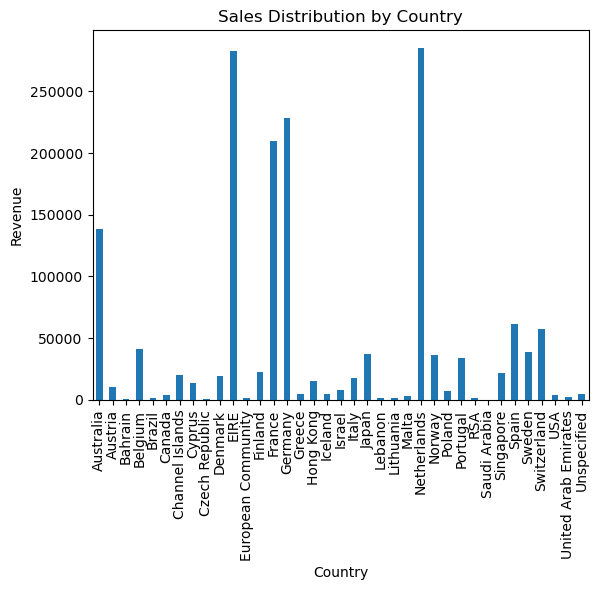

In [63]:
s = salesByCoyntry.drop(salesByCoyntry[salesByCoyntry.index == topSalesByCountry].index)

s.plot(kind='bar', title='Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

#### 3. Top Products by Sales: Create a bar chart for the top 10 best-selling products.

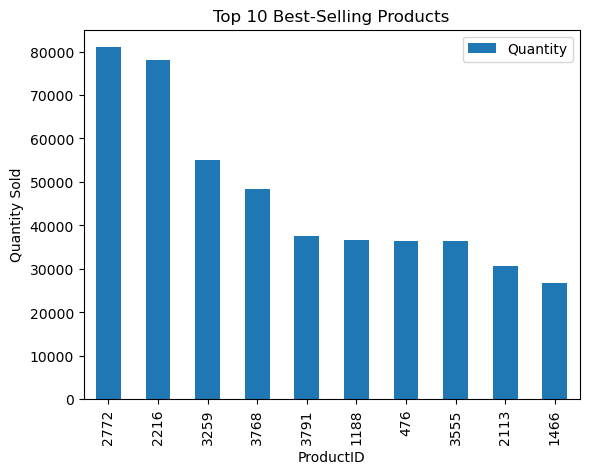

In [64]:
topProduct.plot(kind='bar', title='Top 10 Best-Selling Products')
plt.xlabel('ProductID')
plt.ylabel('Quantity Sold')
plt.show()


#### 4. Customer Segmentation: Create a scatter plot showing customer segmentation based on their total revenue and frequency of purchases.

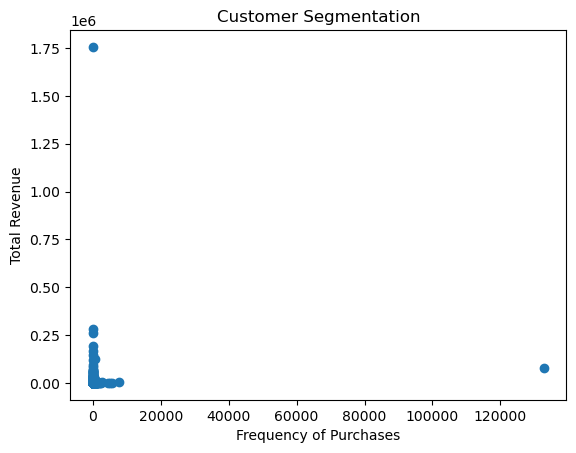

In [65]:
purchase_frequency = df['CustomerID'].value_counts()
total_revenue_by_customer = df.groupby('CustomerID')['TotalRevenue'].sum()

plt.scatter(purchase_frequency, total_revenue_by_customer)
plt.title('Customer Segmentation')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Revenue')
plt.show()


#### 5. Sales Heatmap: Create a heatmap showing sales by day of the week and time of day.


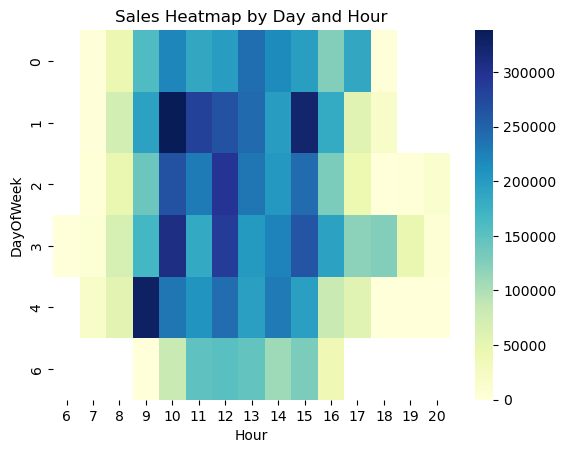

In [66]:
import seaborn as sns

df['Hour'] = df['InvoiceDate'].dt.hour
heatmap_data = df.pivot_table(index='DayOfWeek', columns='Hour', values='TotalRevenue', aggfunc='sum')
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Sales Heatmap by Day and Hour')
plt.show()


#### 6. Product Sales Trends: Create a line chart showing the sales trends of the top 5 products over time.


In [67]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalRevenue', 'Month',
       'Month_Name', 'Year', 'DayOfWeek', 'Hour'],
      dtype='object')

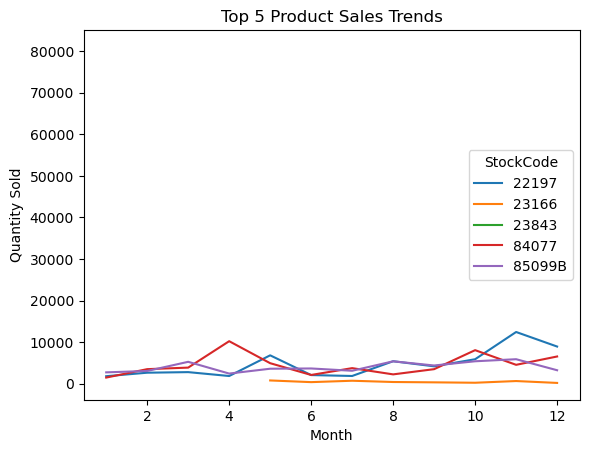

In [68]:
top_5_products = df.groupby('StockCode')['Quantity'].sum().nlargest(5).index
top_products_df = df[df['StockCode'].isin(top_5_products)]

top_products_trends = top_products_df.groupby(['Month', 'StockCode'])['Quantity'].sum().unstack()
top_products_trends.plot(kind='line', title='Top 5 Product Sales Trends')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()


#### 7. Revenue Distribution: Create a histogram showing the distribution of order values

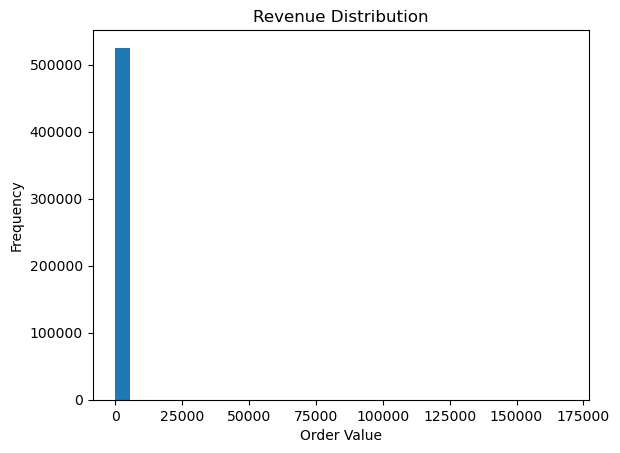

In [69]:
df['TotalRevenue'].plot(kind='hist', bins=30, title='Revenue Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


#### 8. Top Customers: Create a bar chart for the top 10 customers by total revenue.


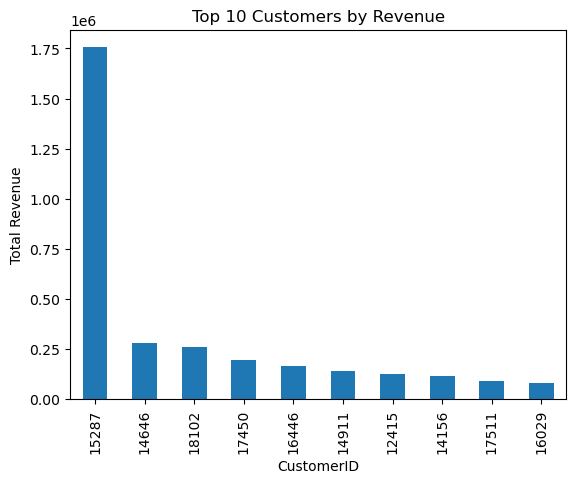

In [70]:
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.show()


#### 9. Sales Performance: Create a dashboard combining multiple visualizations (e.g., revenue over time, top products, and sales by country).

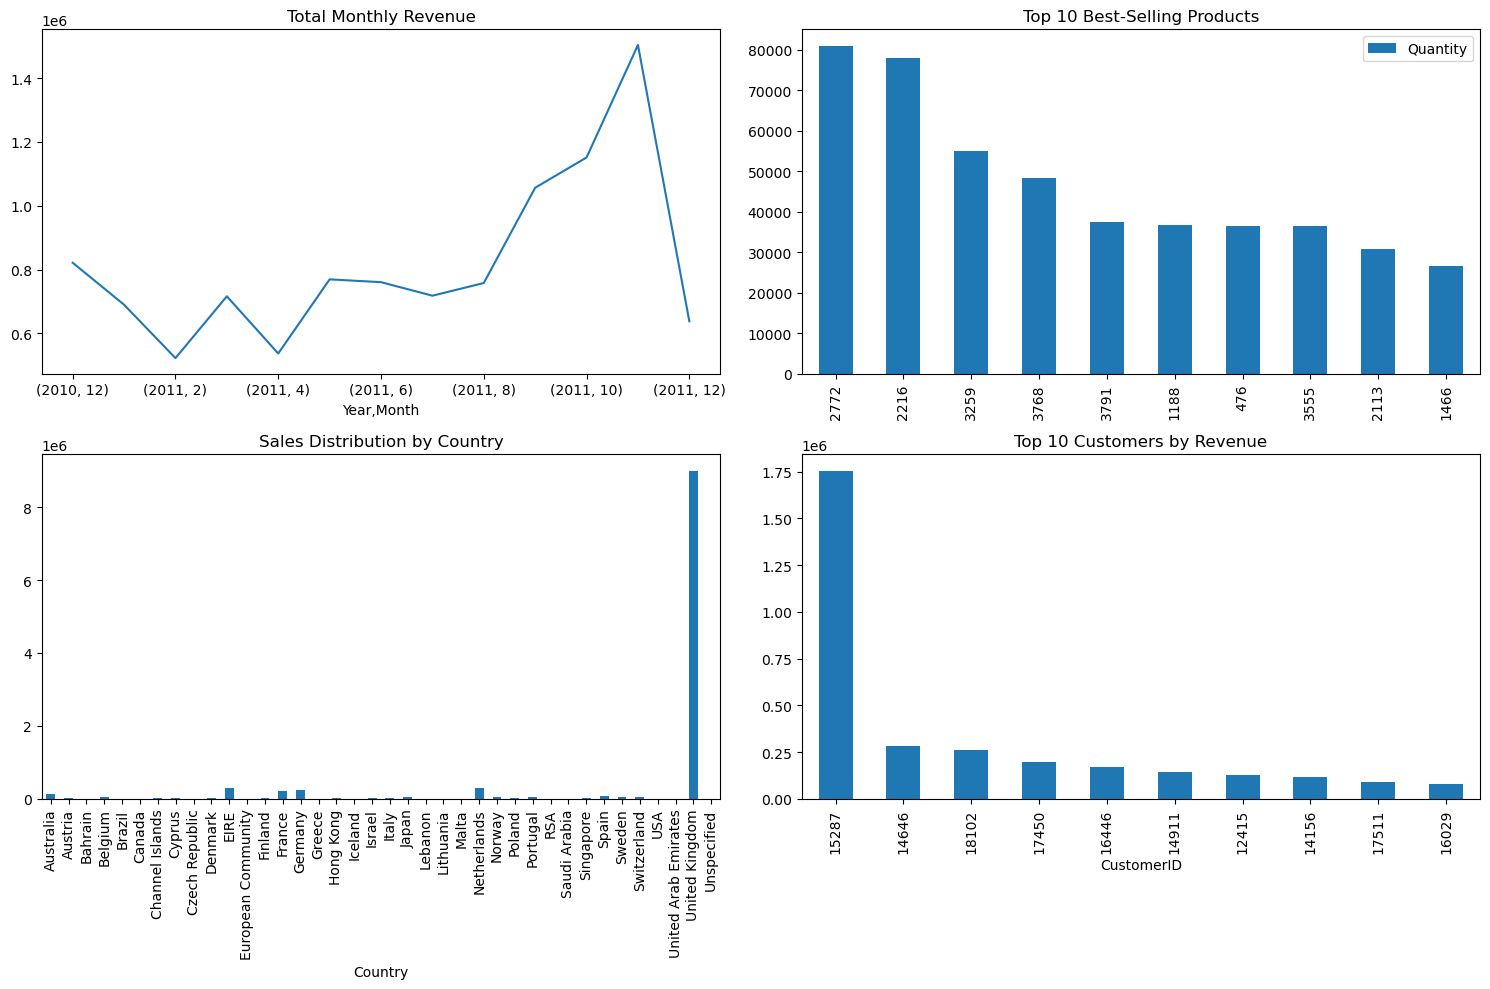

In [71]:

# Combine multiple visualizations using subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Revenue over time
monthlySales.plot(kind='line', ax=axs[0, 0], title='Total Monthly Revenue')

# Top products
topProduct.plot(kind='bar', ax=axs[0, 1], title='Top 10 Best-Selling Products')

# Sales by country
salesByCoyntry.plot(kind='bar', ax=axs[1, 0], title='Sales Distribution by Country')

# Top customers
top_customers.plot(kind='bar', ax=axs[1, 1], title='Top 10 Customers by Revenue')

plt.tight_layout()
plt.show()


#### 10.Customer Lifetime Value: Create a box plot showing the distribution of customer lifetime values.


In [72]:
total_revenue_by_customer.nlargest(2)

CustomerID
15287    1755388.60
14646     280206.02
Name: TotalRevenue, dtype: float64

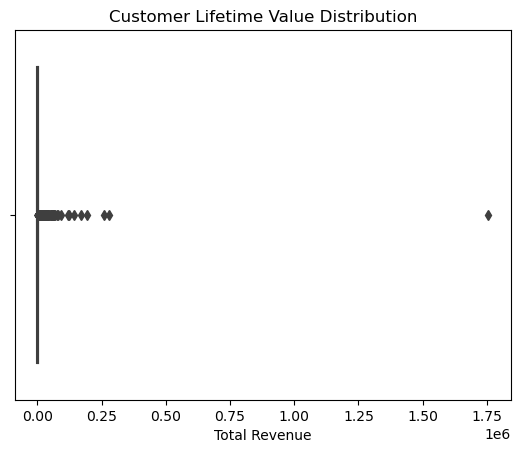

In [73]:

sns.boxplot(x=total_revenue_by_customer)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Revenue')
plt.show()


#### 11.Show correlation matrix

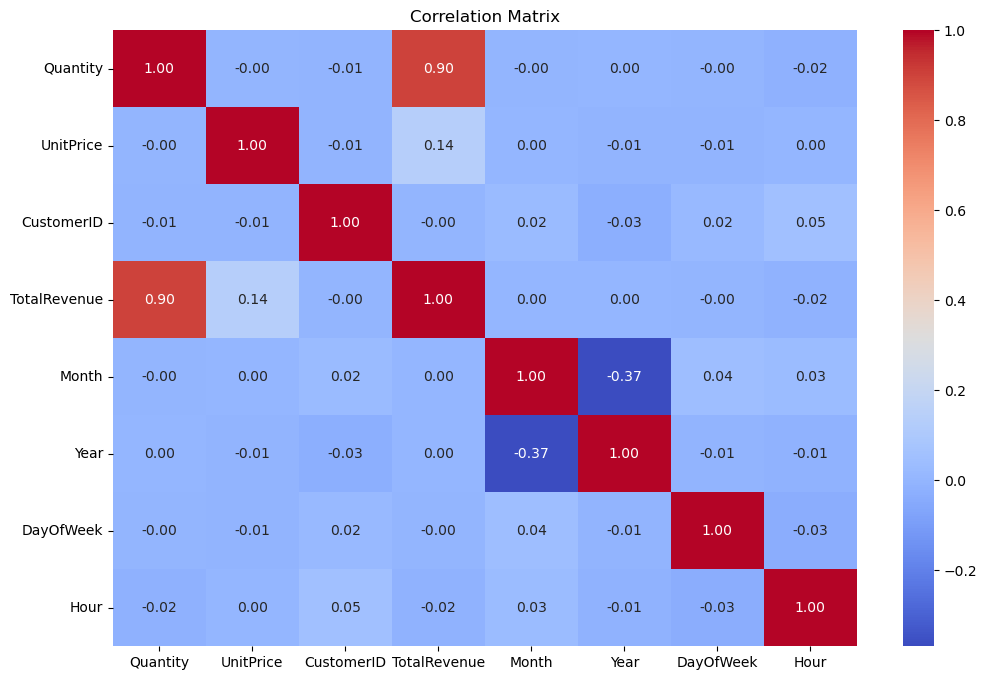

In [74]:

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
